In [3]:
import time

In [4]:
class Drone:
    def __init__(self, id, x, y, speed, time):
        self.id = id
        self.x = x
        self.y = y
        self.speed = speed
        self.time = time

In [5]:
class Movement:
    def __init__(self, drone_id, dx, dy):
        self.drone_id = drone_id
        self.dx = dx
        self.dy = dy

In [6]:
def distance(x1, y1, x2, y2):
    return ((x2-x1)**2 + (y2-y1)**2)**0.5

In [7]:
def get_paths_helper(drones, path, paths):
    if len(path) == len(drones):
        paths.append(path.copy())
        return
    last_x = path[-1][1]
    last_y = path[-1][2]
    for i in range(len(drones)):
        if i not in [p[0] for p in path]:
            drone = drones[i]
            d = distance(last_x, last_y, drone.x, drone.y)
            if d/drone.speed <= drone.time:
                path.append([i, drone.x, drone.y])
                get_paths_helper(drones, path, paths)
                path.pop()

In [8]:
def get_paths(drones):
    paths = []
    for i in range(len(drones)):
        get_paths_helper(drones, [[i, drones[i].x, drones[i].y]], paths)
    return paths

In [9]:
def simulate(drones, paths):
    for i in range(len(paths[0])):
        locations = {}
        for drone in drones:
            locations[drone.id] = (drone.x, drone.y)
        for j in range(len(drones)):
            drone = drones[j]
            move = paths[j][i]
            drone.x = move.dx
            drone.y = move.dy
            print(f"Drone {drone.id}: {locations[drone.id]} -> ({drone.x}, {drone.y})")
        for j in range(len(drones)):
            drone1 = drones[j]
            for k in range(j+1, len(drones)):
                drone2 = drones[k]
                if drone1.x == drone2.x and drone1.y == drone2.y:
                    print(f"Collision between drone {drone1.id} and drone {drone2.id}")
        time.sleep(1)

In [10]:
if __name__ == '__main__':
    # define the list of drones
    drones = [
    Drone(1, 1, 18, 2, 30),
    Drone(2, 5, 22, 1.5, 20),
    Drone(3, 10, 10, 1, 15)
]

    # generate all possible paths for the drones
    paths = get_paths(drones)

In [11]:
# simulate the movement of the drones
for i in range(len(paths)):
    print(f"Drone {i}:")
    for point in paths[i]:
        print(f"({point[1]}, {point[2]})")

Drone 0:
(1, 18)
(5, 22)
(10, 10)
Drone 1:
(1, 18)
(10, 10)
(5, 22)
Drone 2:
(5, 22)
(1, 18)
(10, 10)
Drone 3:
(5, 22)
(10, 10)
(1, 18)
Drone 4:
(10, 10)
(1, 18)
(5, 22)
Drone 5:
(10, 10)
(5, 22)
(1, 18)


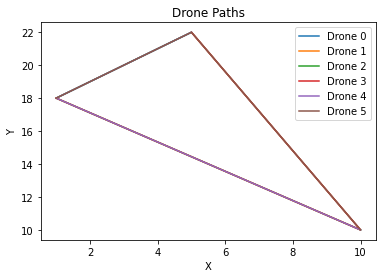

In [12]:


import matplotlib.pyplot as plt

# create a figure and axis object
fig, ax = plt.subplots()

# iterate through each drone's path and plot it on the axis
for i in range(len(paths)):
    drone_path = paths[i]
    x = [p[1] for p in drone_path]
    y = [p[2] for p in drone_path]
    ax.plot(x, y, label=f"Drone {i}")

# set the axis labels and title
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_title("Drone Paths")

# add a legend to the plot
ax.legend()

# show the plot
plt.show()
